# 1.6 Data Manipulation and Preprocessing Practice using dataset cifar10-64

In this notebook I load the cifar10-64 dataset and apply image preprocessing and augmentation. You will see both the original images and augmented images to show verification that the transformations are working as they should.

## Setup

Here, I am importing the libraries needed for image loading, plotting, and augmentation.

In [138]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

plt.rcParams["figure.figsize"] = (6,6)

## Dataset Path

The cifar10-64 dataset was unzipped into my working directory.
I will be using a relative path so the code will run on other systems.

In [141]:
train_dir = "cifar10-64/train"
test_dir  = "cifar10-64/test"

print("Train exists:", os.path.exists(train_dir))
print("Test exists:", os.path.exists(test_dir))

Train exists: True
Test exists: True


## Dataset Structure

Here, each class currently has its own folder. This code will list a few class folders to confirm the dataset structure looks good.

In [144]:
class_names = sorted(os.listdir(train_dir))
print("Number of classes:", len(class_names))
print("Some class folders:", class_names[:5])

Number of classes: 10
Some class folders: ['class0', 'class1', 'class2', 'class3', 'class4']


## Loading One Original Image

prior to preforming any augmentation, I will load one image directly from a class folder. This is so we can compare it later with the augmented versions.

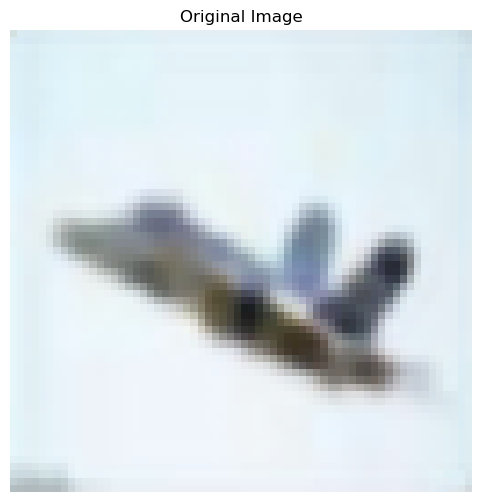

In [147]:
sample_class = class_names[0]
sample_path = os.path.join(train_dir, sample_class)

sample_file = os.listdir(sample_path)[0]
img_path = os.path.join(sample_path, sample_file)

img = load_img(img_path, target_size=(64,64))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

## Converting an Image to Array Tensor

The augmentation pipeline will expect a tensor shape. I will convert the image to an array, and then add a batch dimension.

In [150]:
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

print("Tensor shape:", img_array.shape)

Tensor shape: (1, 64, 64, 3)


## Augmentation Pipeline

Here, I will create an augmentation pipeline. I will keep the values moderate, so the images will not be completely destroyed or possibly cut in half. I will test a few values and adjusted them, so the images are still visually understandable.

In [153]:
augmenter = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    shear_range=8,
    horizontal_flip=True,
    rescale=1.0/255.0,
    fill_mode="nearest"
)

## Plot Function

The code below will plot a grid of images from the generator, so we can have visual verification of the augmentations.

In [156]:
def plot_augmented(generator, n=3):
    fig, axes = plt.subplots(n, n)

    for r in range(n):
        for c in range(n):
            batch = next(generator)
            image = batch[0]
            axes[r, c].imshow(image)
            axes[r, c].axis("off")

    plt.tight_layout()
    plt.show()

## Augmentation Image Results

Here, I will send a single image through the augmentation pipeline and plot the multiple results. We can see each output is slightly different. This is due to random transformations.

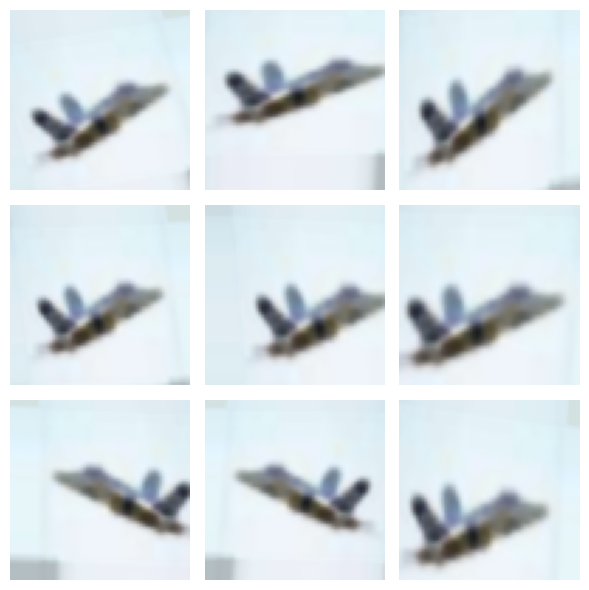

In [159]:
gen = augmenter.flow(img_array, batch_size=1)

plot_augmented(gen, 3)

## Loading the Dataset Using Generator

Here, I will create a directory generator. This is so the dataset is loaded properly from folders and automatically normalize.

In [162]:
train_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_flow = train_gen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)

Found 50000 images belonging to 10 classes.


## Batch Visualization

Here, I will display a few images from a training batch to confirm that loading and preprocessing are working correctly.

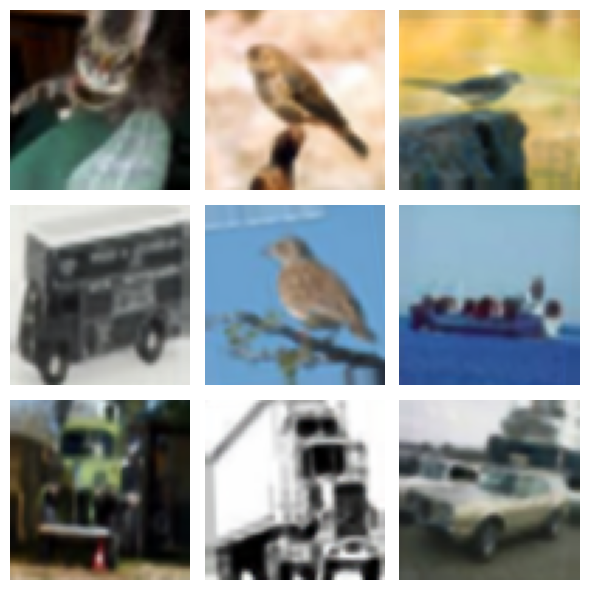

In [165]:
images, labels = next(train_flow)

plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## Reflection

We can see the augmentation pipeline worked as we expected. I was able to test several parameter values and made them less extreme so the objects were still visually recognizable. Using Rotations and flips helped create variation without damaging the images content.

We also got to see that loading from a directory structure also worked correctly. I think using rescaling keeps pixel values between 0 and 1 which is better for machine learning models.

As I worked through this, I broke the notebook into smaller sections, and this made it easier for me to debug and understand each step I was taking along the way. Visualizing both the original and augmented images helped verify the preprocessing pipeline.